In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [106]:
shape = (6,6)
num_samples = 10000

In [15]:
def generate_bas(num_samples, shape):
    '''
    Generate Bars & Stripes data
    '''
    samples = np.zeros((num_samples, shape[0], shape[1]))
    for i in range(num_samples):
        bar = np.random.randint(0, 2)
        if bar == 0:
            for row in range(shape[0]):
                if np.random.randint(0, 2) == 0:
                    samples[i, row, :] = 1
        else:
            for col in range(shape[1]):
                if np.random.randint(0, 2) == 0:
                    samples[i, :, col] = 1
    return samples

def generate_non_bas(num_samples, shape):
    '''
    Generate data not in Bars & Stripes
    '''
    samples = np.zeros((num_samples, shape[0], shape[1]))
    for i in range(num_samples):
        correct = False
        while not correct:
            points = 0
            for row in range(shape[0]):
                for col in range(shape[1]):
                    if np.random.randint(0, 2) == 0:
                        samples[i, row, col] = 1
                        points += 1
                        
            # Make sure not BAS
            for row in range(shape[0]):
                state = samples[i, row, 0]
                for col in range(shape[1]):
                    if samples[i, row, col] != state:
                        correct = True

            for col in range(shape[1]):
                state = samples[i, 0, col]
                for row in range(shape[0]):
                    if samples[i, row, col] != state:
                        correct = True
            
            correct = correct and points > 0
            
    return samples
        

In [177]:
bas_data = generate_bas(num_samples, shape)
non_bas_data = generate_non_bas(num_samples, shape)

In [178]:
bas_data = np.append(bas_data.reshape(num_samples, shape[0]*shape[1]), np.zeros((num_samples, 2)), axis=1)
bas_data[:, -2] = 1
non_bas_data = np.append(non_bas_data.reshape(num_samples, shape[0]*shape[1]), np.zeros((num_samples, 2)), axis=1)
non_bas_data[:,-1] = 1

total_data = np.array([bas_data, non_bas_data]).reshape(2*num_samples, shape[0]*shape[1]+2)

np.random.shuffle(total_data)

In [179]:
X = total_data[:, :-2].reshape(2*num_samples, shape[0], shape[1])
Y = total_data[:, -2:]

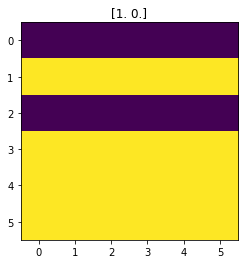

In [218]:
i=1000
plt.title(Y[i])
plt.imshow(X[i])

In [183]:
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

In [159]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [184]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(shape[0]*shape[1],)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))
model.summary()

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 64)                2368      
                                                                 
 dense_25 (Dense)            (None, 32)                2080      
                                                                 
 dense_26 (Dense)            (None, 16)                528       
                                                                 
 dense_27 (Dense)            (None, 2)                 34        
                                                                 
Total params: 5,010
Trainable params: 5,010
Non-trainable params: 0
_________________________________________________________________


In [187]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [188]:
history = model.fit(X_train.reshape(X_train.shape[0], shape[0] * shape[1]), Y_train, epochs=10, validation_data=(X_test.reshape(X_test.shape[0], shape[0] * shape[1]), Y_test))

Epoch 1/10
500/500 [==============================] - 2s 3ms/step - loss: 0.1561 - accuracy: 0.9548 - val_loss: 0.0031 - val_accuracy: 0.9998
Epoch 2/10
500/500 [==============================] - 2s 3ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 5.8199e-04 - val_accuracy: 1.0000
Epoch 3/10
500/500 [==============================] - 1s 3ms/step - loss: 2.2475e-04 - accuracy: 1.0000 - val_loss: 2.5873e-04 - val_accuracy: 1.0000
Epoch 4/10
500/500 [==============================] - 2s 3ms/step - loss: 9.4447e-05 - accuracy: 1.0000 - val_loss: 1.7328e-04 - val_accuracy: 1.0000
Epoch 5/10
500/500 [==============================] - 2s 3ms/step - loss: 5.0212e-05 - accuracy: 1.0000 - val_loss: 1.5328e-04 - val_accuracy: 1.0000
Epoch 6/10
500/500 [==============================] - 2s 3ms/step - loss: 2.9420e-05 - accuracy: 1.0000 - val_loss: 1.5754e-04 - val_accuracy: 1.0000
Epoch 7/10
500/500 [==============================] - 2s 3ms/step - loss: 1.8346e-05 - accuracy: 1.0000 - val_lo

In [189]:
model.predict(X_test[10].reshape(1, shape[0] * shape[1]))

array([[2.5221264e-06, 9.9999750e-01]], dtype=float32)

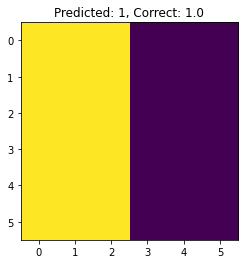

In [203]:
i = 1024
prediction = model.predict(X_test[i].reshape(1, shape[0] * shape[1]))
plt.title(f'Predicted: {np.argmax(prediction)}, Correct: {Y_test[i]}')
plt.imshow(X_test[i])

In [204]:
close_data = generate_bas(1, (6, 6))

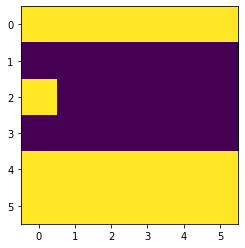

In [207]:
plt.imshow(close_data[0])

In [214]:
close_data[0][2,5] = 1

[[0.20764941 0.7923506 ]]


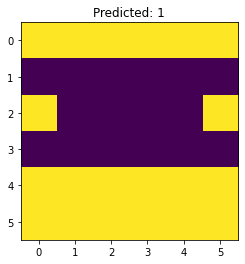

In [215]:
prediction = model.predict(close_data[0].reshape(1, shape[0] * shape[1]))
print(prediction)
plt.title(f'Predicted: {np.argmax(prediction)}')
plt.imshow(close_data[0])